In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

# 用networkx挖掘图数据

In [3]:
# 读facebook的10个用户数据
Graph_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)

In [5]:
# 初步看看图的相关信息
print(nx.info(Graph_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [6]:
# 为可视化做准备
spring_pos = nx.spring_layout(Graph_fb)

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


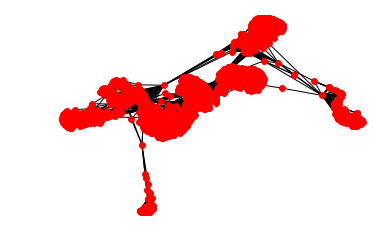

In [7]:
# 绘图，可视化
plt.axis("off")
nx.draw_networkx(Graph_fb, pos = spring_pos, with_labels = False, node_size = 35)

# Parallel Betweenness Centrality

In [11]:
from multiprocessing import Pool
import itertools

In [12]:
def partitions(nodes, n):
    "把节点分成n个子集"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

![](http://7xo0y8.com1.z0.glb.clouddn.com/explaination.png)

In [13]:
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

In [14]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

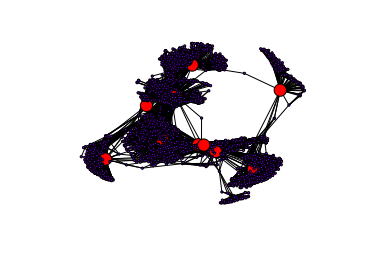

In [16]:
bt = between_parallel(Graph_fb)
top = 10

max_nodes =  sorted(bt.iteritems(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(Graph_fb.nodes())
bt_colors = [0]*len(Graph_fb.nodes())
for max_key, max_val in max_nodes:
    bt_values[max_key] = 150
    bt_colors[max_key] = 2
 
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

# 社区发现

In [7]:
import community

In [8]:
parts = community.best_partition(Graph_fb)
values = [parts.get(node) for node in Graph_fb.nodes()]

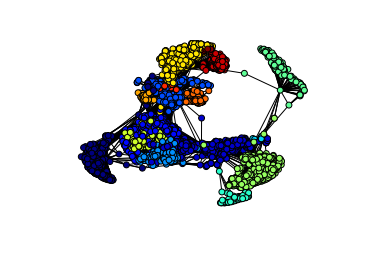

In [10]:
plt.axis("off")
nx.draw_networkx(Graph_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)